# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from api_keys import weather_api_key,geoapify_key

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-40, 40)
lng_range = (-150, 150)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(city)
print(f"Number of cities in the list: {len(cities)}")

beira
Number of cities in the list: 754


---

In [ ]:
import pprint
pprint.pprint(cities)

['taiohae',
 'edinburgh of the seven seas',
 'jaisalmer',
 'sitangkai',
 'rehoboth',
 'nova sintra',
 'iranshahr',
 'adamstown',
 'benjamin constant',
 'tahoua',
 'barika',
 'jamestown',
 'urucara',
 'hawaiian paradise park',
 'arar',
 'walvis bay',
 'barah',
 'bandarbeyla',
 'san antonio de pale',
 'pisco',
 'vila franca do campo',
 'galliano',
 'guapo',
 'patos',
 'jaguaruna',
 'puerto ayora',
 'dolisie',
 'antsiranana',
 'coquimbo',
 'fallon',
 "st. john's",
 'touros',
 "muzayri'",
 'mwatate',
 'maebaru-chuo',
 'laguna',
 'zouerate',
 'west island',
 'phalodi',
 'carnarvon',
 'afaahiti',
 'olinda',
 'lubang',
 'codrington',
 'rincon',
 'molteno',
 'taoudenni',
 'nova vicosa',
 'puerto ayacucho',
 'papao',
 'zhangye',
 'laascaanood',
 'flying fish cove',
 'taltal',
 'margaret river',
 'changshu city',
 'arfoud',
 'nouadhibou',
 'fairmont',
 'san patricio',
 'sao tome',
 'howard springs',
 'port-aux-francais',
 'arraial do cabo',
 'sonsorol village',
 'san jose de jachal',
 'calp',
 '

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kerikeri,-35.2268,173.9474,14.39,90,100,0.98,NZ,1718607765
1,ginir,7.1333,40.7000,22.08,47,100,1.53,ET,1718607742
2,margaret river,-33.9500,115.0667,15.44,67,60,3.76,AU,1718607768
3,bam,29.1060,58.3570,38.66,10,0,7.82,IR,1718607769
4,marrakesh,31.6315,-8.0083,17.04,72,0,3.09,MA,1718607770


In [ ]:
#My Solution Prototype Begins

In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=d14ee3f61fc19b1b3793df6059112143&units=metric&q=


In [6]:
cities = [
    "New York", "Los Angeles", "Chicago", "Houston", "Phoenix", "Philadelphia", 
    "San Antonio", "San Diego", "Dallas", "San Jose", "Austin", "Jacksonville", 
    "Fort Worth", "Columbus", "Charlotte", "San Francisco", "Indianapolis", 
    "Seattle", "Denver", "Washington", "Boston", "El Paso", "Nashville", 
    "Detroit", "Oklahoma City", "Portland", "Las Vegas", "Memphis", "Louisville", 
    "Baltimore", "Milwaukee", "Albuquerque", "Tucson", "Fresno", "Sacramento", 
    "Kansas City", "Long Beach", "Mesa", "Atlanta", "Colorado Springs", 
    "Virginia Beach", "Raleigh", "Omaha", "Miami", "Oakland", "Minneapolis", 
    "Tulsa", "Wichita", "New Orleans", "Arlington", "Cleveland", "Tampa", 
    "Aurora", "Anaheim", "Honolulu", "Santa Ana", "Riverside", "Corpus Christi", 
    "Lexington", "Henderson", "Stockton", "Saint Paul", "Cincinnati", "St. Louis", 
    "Pittsburgh", "Greensboro", "Lincoln", "Anchorage", "Plano", "Orlando", 
    "Irvine", "Newark", "Durham", "Chula Vista", "Toledo", "Fort Wayne", 
    "St. Petersburg", "Laredo", "Jersey City", "Chandler", "Madison", "Lubbock", 
    "Scottsdale", "Reno", "Buffalo", "Gilbert", "Glendale", "North Las Vegas", 
    "Winston-Salem", "Chesapeake", "Norfolk", "Fremont", "Garland", "Irving", 
    "Hialeah", "Richmond", "Boise", "Spokane", "Baton Rouge", "Tacoma", 
    "San Bernardino", "Modesto", "Fontana", "Des Moines", "Moreno Valley", 
    "Santa Clarita", "Fayetteville", "Birmingham", "Oxnard", "Rochester", 
    "Port St. Lucie", "Grand Rapids", "Huntsville", "Salt Lake City", "Frisco", 
    "Yonkers", "Amarillo", "Glendale", "Huntington Beach", "McKinney", 
    "Montgomery", "Augusta", "Aurora", "Akron", "Little Rock", "Tempe", 
    "Columbus", "Overland Park", "Grand Prairie", "Tallahassee", "Cape Coral", 
    "Mobile", "Knoxville", "Shreveport", "Worcester", "Ontario", "Vancouver", 
    "Sioux Falls", "Chattanooga", "Brownsville", "Fort Lauderdale", "Providence", 
    "Newport News", "Rancho Cucamonga", "Santa Rosa", "Peoria", "Oceanside", 
    "Elk Grove", "Salem", "Pembroke Pines", "Eugene", "Garden Grove", 
    "Cary", "Fort Collins", "Corona", "Springfield", "Jackson", "Alexandria", 
    "Hayward", "Clarksville", "Lakewood", "Lancaster", "Salinas", "Palmdale", 
    "Hollywood", "Springfield", "Macon", "Kansas City", "Sunnyvale", "Pomona", 
    "Killeen", "Escondido", "Pasadena", "Naperville", "Bellevue", "Joliet", 
    "Murfreesboro", "Midland", "Rockford", "Paterson", "Savannah", "Bridgeport", 
    "Torrance", "McAllen", "Syracuse", "Surprise", "Denton", "Roseville", 
    "Thornton", "Miramar", "Pasadena", "Mesquite", "Olathe", "Dayton", 
    "Carrollton", "Waco", "Orange", "Fullerton", "Charleston", "West Valley City", 
    "Visalia", "Hampton", "Gainesville", "Warren", "Coral Springs", "Cedar Rapids", 
    "Round Rock", "Sterling Heights", "Kent", "Columbia", "Santa Clara", 
    "New Haven", "Stamford", "Concord", "Elizabeth", "Athens", "Thousand Oaks", 
    "Lafayette", "Simi Valley", "Topeka", "Norman", "Fargo", "Wilmington", 
    "Abilene", "Odessa", "Columbia", "Pearland", "Victorville", "Hartford", 
    "Vallejo", "Allentown", "Berkeley", "Richardson", "Arvada", "Ann Arbor", 
    "Rochester", "Cambridge", "Sugar Land", "Lansing", "Evansville", "College Station", 
    "Fairfield", "Clearwater", "Beaumont", "Independence", "Provo", "West Jordan", 
    "Murrieta", "Palm Bay", "El Monte", "Carlsbad", "North Charleston", 
    "Temecula", "Clovis", "Springfield", "Meridian", "Westminster", "Costa Mesa", 
    "High Point", "Manchester", "Pueblo", "Lakeland", "Pompano Beach", 
    "West Palm Beach", "Antioch", "Everett", "Downey", "Lowell", "Centennial", 
    "Elgin", "Richmond", "Peoria", "Broken Arrow", "Miami Gardens", "Billings", 
    "Jurupa Valley", "Sandy Springs", "Gresham", "Lewisville", "Hillsboro", 
    "Ventura", "Greeley", "Inglewood", "Waterbury", "League City", "Santa Maria", 
    "Tyler", "Davie", "Lakewood", "Daly City", "Boulder", "Allen", "West Covina", 
    "Sparks", "Wichita Falls", "Green Bay", "San Mateo", "Norwalk", "Rialto", 
    "Las Cruces", "Chico", "El Cajon", "Burbank", "South Bend", "Renton", 
    "Vista", "Davenport", "Edinburg", "Tuscaloosa", "Carmel", "Spokane Valley", 
    "San Angelo", "Vacaville", "Clinton", "Bend", "Woodbridge", "San Marcos", 
    "Hesperia", "Redding", "Brockton", "Daly City", "Canton", "Erie", 
    "South Gate", "Mission Viejo", "Vacaville", "Boca Raton", "San Marcos", 
    "Greenville", "Waukegan", "Fall River", "Chino", "Newton", "San Leandro", 
    "Reading", "Norwalk", "Fort Smith", "New Bedford", "Trenton", "Ogden", 
    "Hoover", "Cicero", "Fishers", "Sugar Land", "Danbury", "Meridian", 
    "Indio", "Concord", "Menifee", "Champaign", "Buena Park", "Troy", 
    "Orem", "Johns Creek", "Bellingham", "Westland", "Bloomington", "Sioux City", 
    "Warwick", "Hemet", "Longview", "Farmington Hills", "Bend", "Lakewood", 
    "Merced", "Mission", "Chino Hills", "Redwood City", "Nampa", "Alhambra", 
    "Bloomington", "Rochester Hills", "Avondale", "Somerville", "Palm Coast", 
    "Bryan", "Gary", "Largo", "Brooklyn Park", "Tustin", "St. George", 
    "Cranston", "Manteca", "Redlands", "Jacksonville", "Nashua", "Bossier City", 
    "Lawrence", "Plymouth", "Dearborn", "Santa Fe", "Lynchburg", "Mountain View", 
    "Medford", "Chino", "Alameda", "Baldwin Park", "Upland", "Folsom", 
    "San Ramon", "Pleasanton", "Wyoming", "Lake Charles", "Plymouth", 
    "Bolingbrook", "Pharr", "Appleton", "Gastonia", "Folsom", "Southfield", 
    "Rochester", "New Britain", "Goodyear", "Canton", "Warner Robins", 
    "Union City", "Perris", "Manteca", "Iowa City", "Jonesboro", "Wilmington", 
    "Lynwood", "Loveland", "Pawtucket", "Boynton Beach", "Waukesha", 
    "Gulfport", "Apple Valley", "Passaic", "Rapid City", "Layton", "Lafayette", 
    "Turlock", "Muncie", "Temple", "Kolkata","Siliguri", "Durgapur"]

In [7]:
# List of cities
#cities = ["Paris", "London", "Oslo", "Beijing", "Chicago", "New York", "San Francisco", "Los Angeles"]
#cities = ["New York", "Los Angeles", "Chicago", "Houston", "Phoenix", "Philadelphia", "San Antonio", "San Diego", "Dallas", "San Jose"]
#cities = cities
# set up lists to hold response info
lat = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []
country =[]
# Loop through the list of cities and perform a request for data on each
try:

    for city in cities:
        response = requests.get(query_url + city).json()
        print(city)
        print(response)
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
    
       
        print(f"The latitude information received is: {lat}")
        print(f"The temperature information received is: {temp}")
        print(f"The humidity information received is: {humidity}")
        print(f"The cloudiness information received is: {cloudiness}")
        print(f"The wind_speed information received is: {wind_speed}")
        
except:       
    
    print(f"city not found {city}")
    pass
    # pause to avoid rate limiting
time.sleep(1)


New York
{'coord': {'lon': -74.006, 'lat': 40.7143}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 23.42, 'feels_like': 24.14, 'temp_min': 21.79, 'temp_max': 24.31, 'pressure': 1014, 'humidity': 89, 'sea_level': 1014, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 230}, 'clouds': {'all': 0}, 'dt': 1722824666, 'sys': {'type': 1, 'id': 4610, 'country': 'US', 'sunrise': 1722765360, 'sunset': 1722816486}, 'timezone': -14400, 'id': 5128581, 'name': 'New York', 'cod': 200}
The latitude information received is: [40.7143]
The temperature information received is: [23.42]
The humidity information received is: [89]
The cloudiness information received is: [0]
The wind_speed information received is: [3.6]
Los Angeles
{'coord': {'lon': -118.2437, 'lat': 34.0522}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 29.96, 'feels_l

In [8]:
print(response)

{'coord': {'lon': 87.3167, 'lat': 23.4833}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 28.16, 'feels_like': 34.07, 'temp_min': 28.16, 'temp_max': 28.16, 'pressure': 1005, 'humidity': 89, 'sea_level': 1005, 'grnd_level': 996}, 'visibility': 5000, 'wind': {'speed': 3.09, 'deg': 250}, 'clouds': {'all': 40}, 'dt': 1722824963, 'sys': {'type': 1, 'id': 9144, 'country': 'IN', 'sunrise': 1722814951, 'sunset': 1722862255}, 'timezone': 19800, 'id': 1272175, 'name': 'Durgapur', 'cod': 200}


In [9]:
# create a DataFrame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp,
    "humidity" : humidity,
    "cloudiness" : cloudiness,
    "wind_speed" : wind_speed,
    "date" : date,
    "country" : country
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,temp,humidity,cloudiness,wind_speed,date,country
0,New York,40.7143,23.42,89,0,3.60,1722824666,US
1,Los Angeles,34.0522,29.96,37,0,3.60,1722824388,US
2,Chicago,41.8500,27.25,66,79,1.91,1722824412,US
3,Houston,29.7633,30.60,69,0,3.60,1722824400,US
4,Phoenix,33.4484,41.61,21,75,10.80,1722824651,US
...,...,...,...,...,...,...,...,...
433,Muncie,40.1934,23.03,86,0,0.00,1722824963,US
434,Temple,31.0982,30.86,55,20,3.09,1722824963,US
435,Kolkata,22.5697,29.97,89,75,3.09,1722824375,IN
436,Siliguri,26.7000,26.75,92,100,2.93,1722824384,IN


In [10]:
# Add a city_id column
weather_data['city_id'] = weather_data.index

# Replace the index with city_id
weather_data.set_index('city_id', inplace=True)
print(weather_data.head())


                city      lat   temp  humidity  cloudiness  wind_speed  \
city_id                                                                  
0           New York  40.7143  23.42        89           0        3.60   
1        Los Angeles  34.0522  29.96        37           0        3.60   
2            Chicago  41.8500  27.25        66          79        1.91   
3            Houston  29.7633  30.60        69           0        3.60   
4            Phoenix  33.4484  41.61        21          75       10.80   

               date country  
city_id                      
0        1722824666      US  
1        1722824388      US  
2        1722824412      US  
3        1722824400      US  
4        1722824651      US  


In [11]:
weather_data.to_csv("output_data/weather.csv", index_label="City_ID")
print(weather_data)


                city      lat   temp  humidity  cloudiness  wind_speed  \
city_id                                                                  
0           New York  40.7143  23.42        89           0        3.60   
1        Los Angeles  34.0522  29.96        37           0        3.60   
2            Chicago  41.8500  27.25        66          79        1.91   
3            Houston  29.7633  30.60        69           0        3.60   
4            Phoenix  33.4484  41.61        21          75       10.80   
...              ...      ...    ...       ...         ...         ...   
433           Muncie  40.1934  23.03        86           0        0.00   
434           Temple  31.0982  30.86        55          20        3.09   
435          Kolkata  22.5697  29.97        89          75        3.09   
436         Siliguri  26.7000  26.75        92         100        2.93   
437         Durgapur  23.4833  28.16        89          40        3.09   

               date country  
city_id

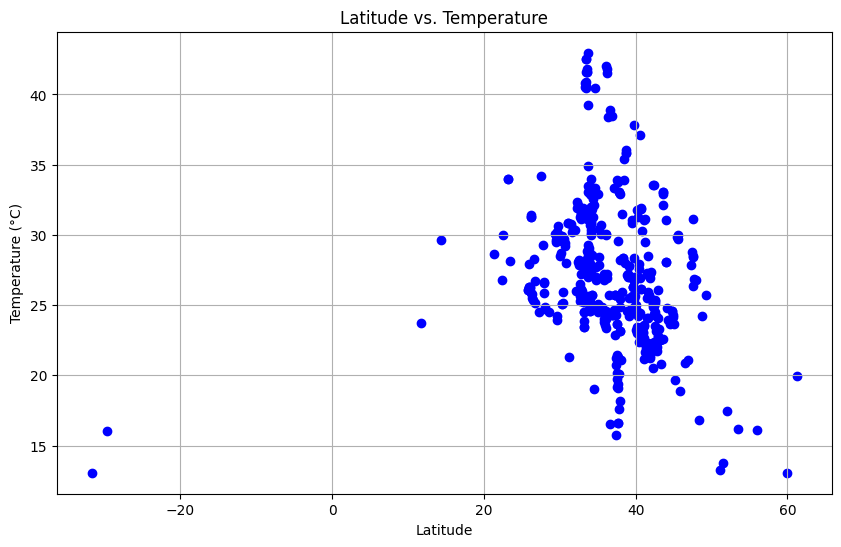

In [12]:
# Create scatter plot (Latitude vs Temparature)
plt.figure(figsize=(10, 6))
plt.scatter(weather_data['lat'], weather_data['temp'], color='blue', marker='o')

# Add titles and labels
plt.title('Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')

# Show plot
plt.grid(True)
plt.savefig("output_data/solution1.png")
plt.show()



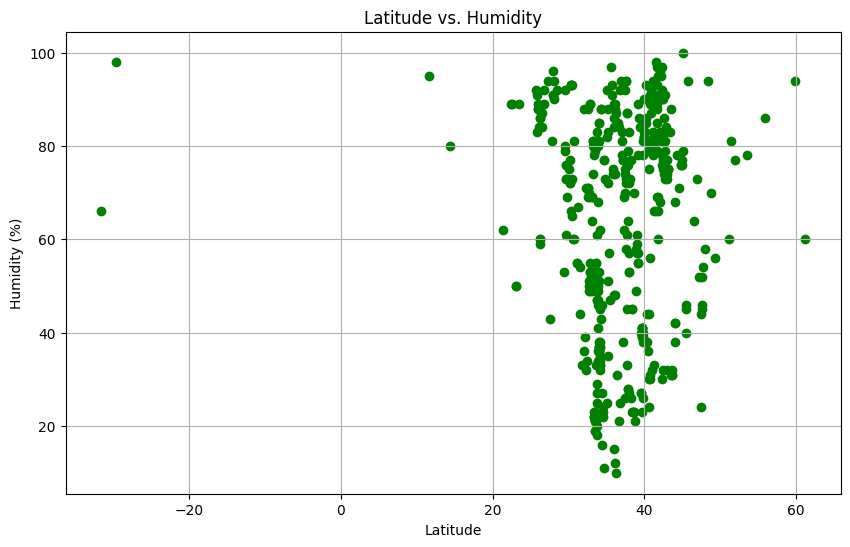

In [13]:
# Create scatter plot ('Latitude vs. Humidity')
plt.figure(figsize=(10, 6))
plt.scatter(weather_data['lat'], weather_data['humidity'], color='green', marker='o')

# Add titles and labels
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig("output_data/solution2.png")
plt.show()

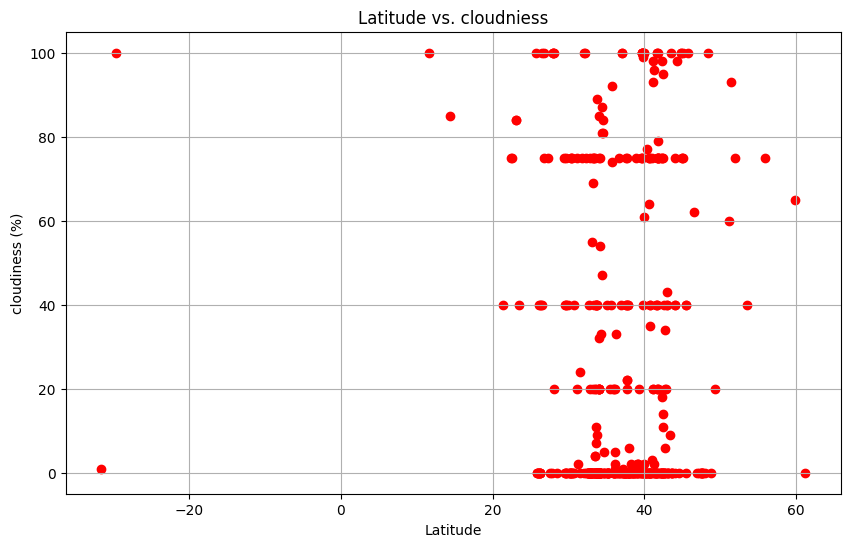

In [14]:
# Create scatter plot ('Latitude vs. cloudiness')
plt.figure(figsize=(10, 6))
plt.scatter(weather_data['lat'], weather_data['cloudiness'], color='red', marker='o')

# Add titles and labels
plt.title('Latitude vs. cloudniess')
plt.xlabel('Latitude')
plt.ylabel('cloudiness (%)')

# Show plot
plt.grid(True)
plt.savefig("output_data/solution3.png")
plt.show()

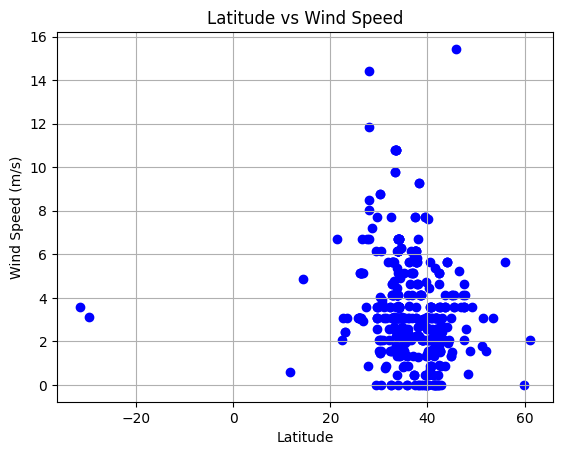

In [15]:
# Create scatter plot ('Latitude vs. wind_speed')
# Extract latitude and wind speed
lat = weather_data['lat']
wind_speed = weather_data['wind_speed']

# Create scatter plot
plt.scatter(lat, wind_speed, color='blue')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Latitude vs Wind Speed')

# Show plot
plt.grid(True)
plt.savefig("output_data/solution3.png")
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [18]:
# Function to create DataFrame with Northern Hemisphere data
def create_northern_hemi_df(df):
    northern_hemi_df = weather_data[weather_data['lat'] >= 0]
    return northern_hemi_df

# Create Northern Hemisphere DataFrame
northern_hemi_df = create_northern_hemi_df(weather_data)

northern_hemi_df


,city,lat,temp,humidity,cloudiness,wind_speed,date,country
city_id,,,,,,,,
0,New York,40.7143,23.42,89,0,3.60,1722824666,US
1,Los Angeles,34.0522,29.96,37,0,3.60,1722824388,US
2,Chicago,41.8500,27.25,66,79,1.91,1722824412,US
3,Houston,29.7633,30.60,69,0,3.60,1722824400,US
4,Phoenix,33.4484,41.61,21,75,10.80,1722824651,US
...,...,...,...,...,...,...,...,...
433,Muncie,40.1934,23.03,86,0,0.00,1722824963,US
434,Temple,31.0982,30.86,55,20,3.09,1722824963,US
435,Kolkata,22.5697,29.97,89,75,3.09,1722824375,IN


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
def create_Southern_hemi_df(df):
    Southern_hemi_df = weather_data[weather_data['lat'] < 0]
    return Southern_hemi_df

# Create Northern Hemisphere DataFrame
Southern_hemi_df = create_Southern_hemi_df(weather_data)


# Display sample data
Southern_hemi_df.head()

,city,lat,temp,humidity,cloudiness,wind_speed,date,country
city_id,,,,,,,,
285,Santa Maria,-29.6842,16.02,98,100,3.12,1722824283,BR
390,Santa Fe,-31.6333,13.07,66,1,3.58,1722824777,AR


###  Temperature vs. Latitude Linear Regression Plot

In [19]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

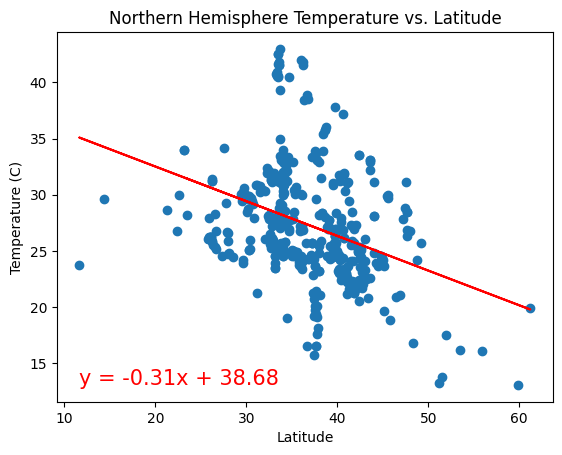

In [20]:

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['lat'], northern_hemi_df['temp'])

# Create regression line
regress_values = northern_hemi_df['lat'] * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the data
plt.scatter(northern_hemi_df['lat'], northern_hemi_df['temp'])
plt.plot(northern_hemi_df['lat'], regress_values, "r-")
plt.annotate(line_eq, (min(northern_hemi_df['lat']), min(northern_hemi_df['temp'])), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title('Northern Hemisphere Temperature vs. Latitude')
plt.show()

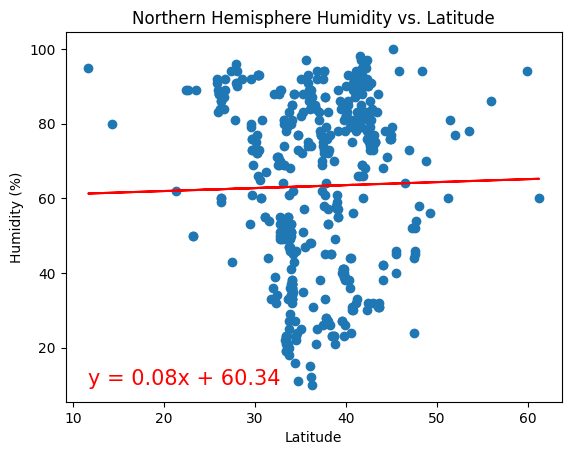

Slope: 0.07965676117175247
Intercept: 60.339047158994575
R-squared: 0.0004185231835317624


In [21]:
# Northern Hemisphere (linear regression)
#  humidity vs lat


# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['lat'], northern_hemi_df['humidity'])

# Create regression line
regress_values = northern_hemi_df['lat'] * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the data
plt.scatter(northern_hemi_df['lat'], northern_hemi_df['humidity'])
plt.plot(northern_hemi_df['lat'], regress_values, "r-")
plt.annotate(line_eq, (min(northern_hemi_df['lat']), min(northern_hemi_df['humidity'])), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere Humidity vs. Latitude')
plt.show()

# Print the regression results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

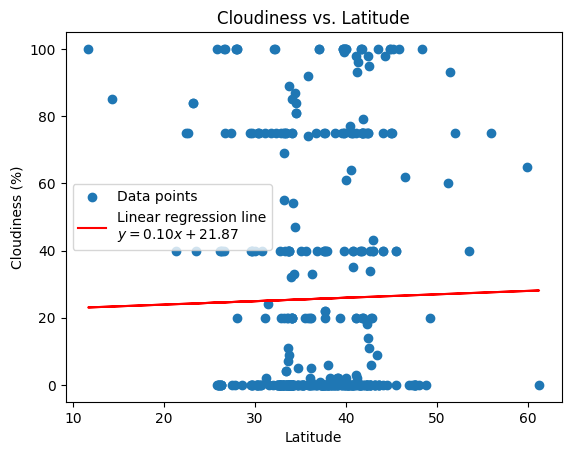

Slope: 0.10
Intercept: 21.87
R-squared: 0.00


In [22]:
# Northern Hemisphere (linear regression)
# cloudiness vs lat

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['lat'], northern_hemi_df['cloudiness'])

# Create regression line
regression_line = slope * northern_hemi_df['lat'] + intercept

# Plot the data
plt.scatter(northern_hemi_df['lat'], northern_hemi_df['cloudiness'], label='Data points')
plt.plot(northern_hemi_df['lat'], regression_line, color='red', label=f'Linear regression line\n$y={slope:.2f}x+{intercept:.2f}$')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs. Latitude')
plt.legend()
plt.show()

# Print the regression results
print(f'Slope: {slope:.2f}')
print(f'Intercept: {intercept:.2f}')
print(f'R-squared: {r_value**2:.2f}')

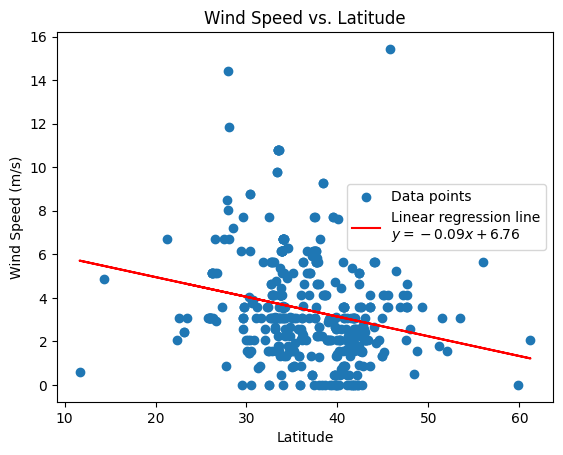

Slope: -0.09
Intercept: 6.76
R-squared: 0.05


In [23]:
# Northern Hemisphere (linear regression)
# wind_speed vs lat
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['lat'], northern_hemi_df['wind_speed'])

# Create regression line
regression_line = slope * northern_hemi_df['lat'] + intercept

# Plot the data
plt.scatter(northern_hemi_df['lat'], northern_hemi_df['wind_speed'], label='Data points')
plt.plot(northern_hemi_df['lat'], regression_line, color='red', label=f'Linear regression line\n$y={slope:.2f}x+{intercept:.2f}$')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed vs. Latitude')
plt.legend()
plt.show()

# Print the regression results
print(f'Slope: {slope:.2f}')
print(f'Intercept: {intercept:.2f}')
print(f'R-squared: {r_value**2:.2f}')

The r^2-value is: 0.6720220238897325


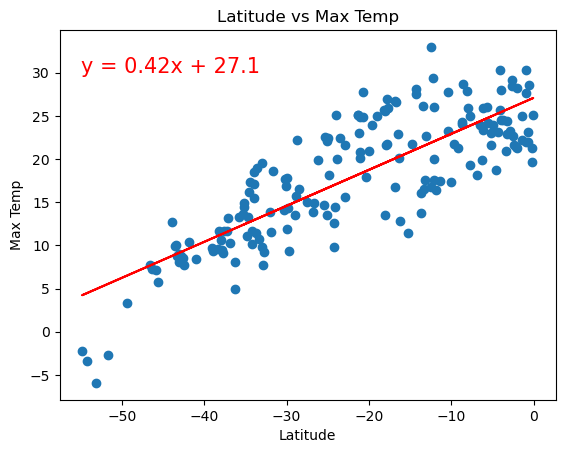

In [ ]:
# Linear regression on Southern Hemisphere
#   TO DO

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.007659599322853922


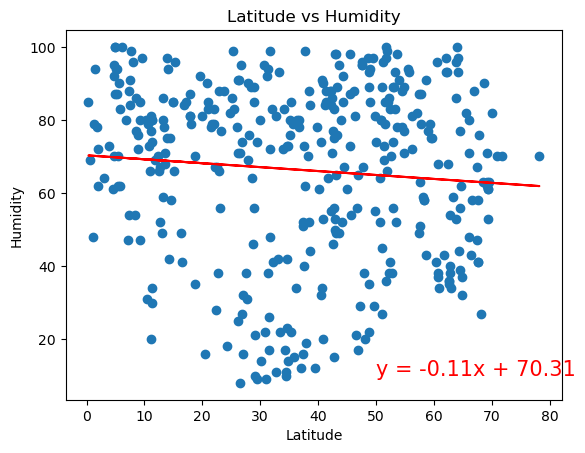

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.00014367159540169783


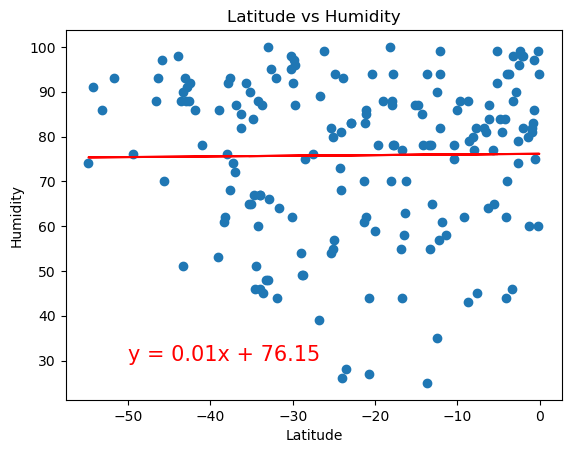

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.006456908379763574


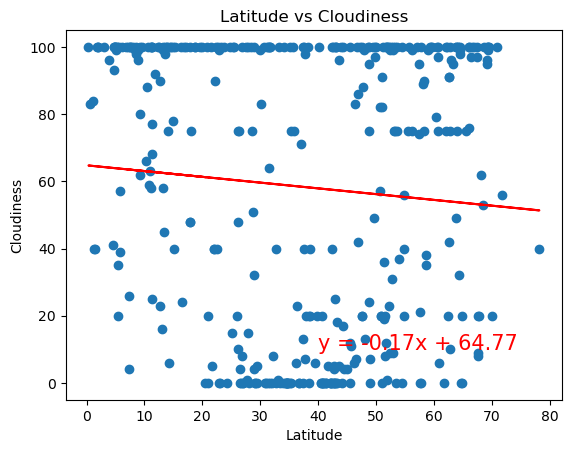

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.018616831531634456


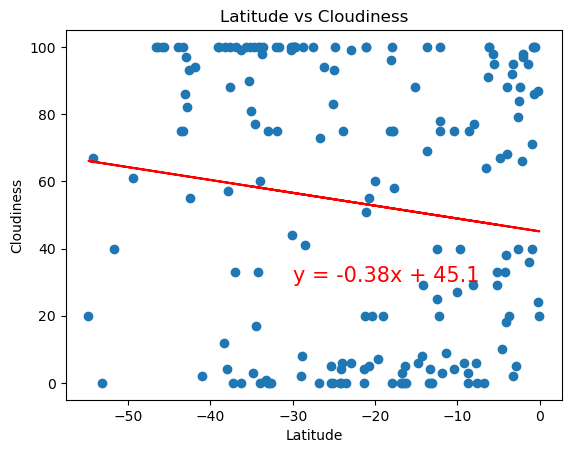

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0017236249523139959


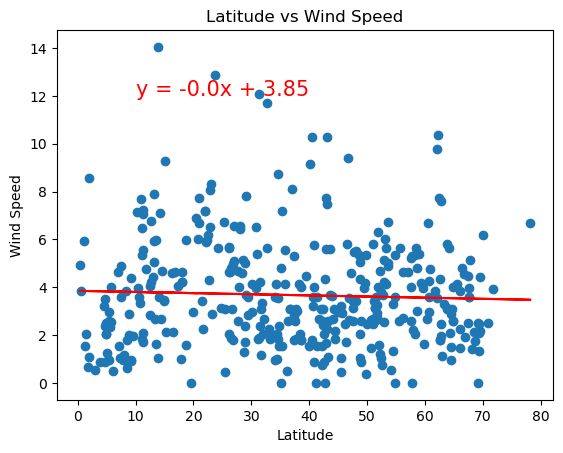

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.06495869418886388


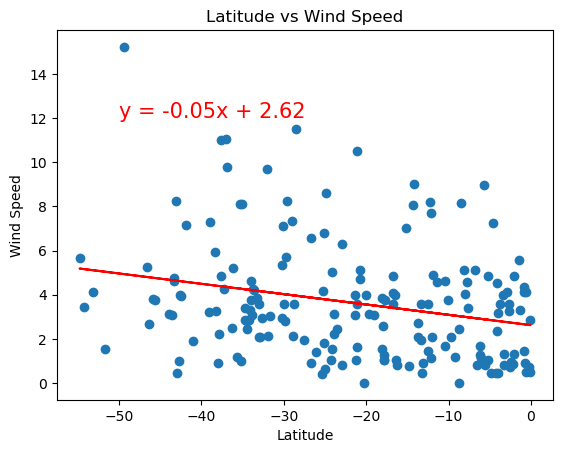

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE